## Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import pickle
import random
from sklearn.svm import SVC

In [2]:

# # Making the train data file and saving in pickle file
# dir = "../AppleandOthers/Combinedataset/Testing/"

# categories = os.listdir(dir)
# data = []

# for category in categories:
#     path = os.path.join(dir,category)
#     label = categories.index(category)
    
#     for img in os.listdir(path):
#         imgpath = os.path.join(path,img)
#         appleimg = cv.imread(imgpath,0)
#         appleimg = cv.resize(appleimg,(100,100))
#         img  = np.array(appleimg).flatten()
#         data.append([img,label])


# pick_in = open('TestData.pickle','wb')
# pickle.dump(data,pick_in)
# pick_in.close()


### Loading data saved in pickle format

In [3]:
pick_in  = open('TrainData.pickle','rb')
train_data=pickle.load(pick_in)
pick_in.close()

### creating features and targets

In [4]:
features = []
labels = []

random.shuffle(train_data)

for feature,label in train_data:
    features.append(feature)
    labels.append(label)

In [5]:
xtrain = np.array(features)
ytrain = np.array(labels)

In [6]:
xtrain.shape,ytrain.shape

((800, 10000), (800,))

### Training the model and saving it.

In [7]:
from sklearn.svm import SVC

# Create an instance of the SVC classifier
model = SVC(C=1,kernel='poly',gamma='auto')

# Fit the classifier to the training data
model.fit(xtrain, ytrain)

# # Save the trained model as a pickle string.
# pickl = {'model': model}
# pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )


### Load Testing Data

In [8]:
pick_in  = open('TestData.pickle','rb')
test_data=pickle.load(pick_in)
pick_in.close()

In [9]:
testfeatures = []
testlabels = []

random.shuffle(test_data)
for feature,label in test_data:
    testfeatures.append(feature)
    testlabels.append(label)
    
xtest = np.array(testfeatures)
ytest = np.array(testlabels)


### Predicting

In [10]:
y_pred = model.predict(xtest)

In [11]:
# import accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest,y_pred)
accuracy

1.0

In [12]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,

#### Plotting the predictions

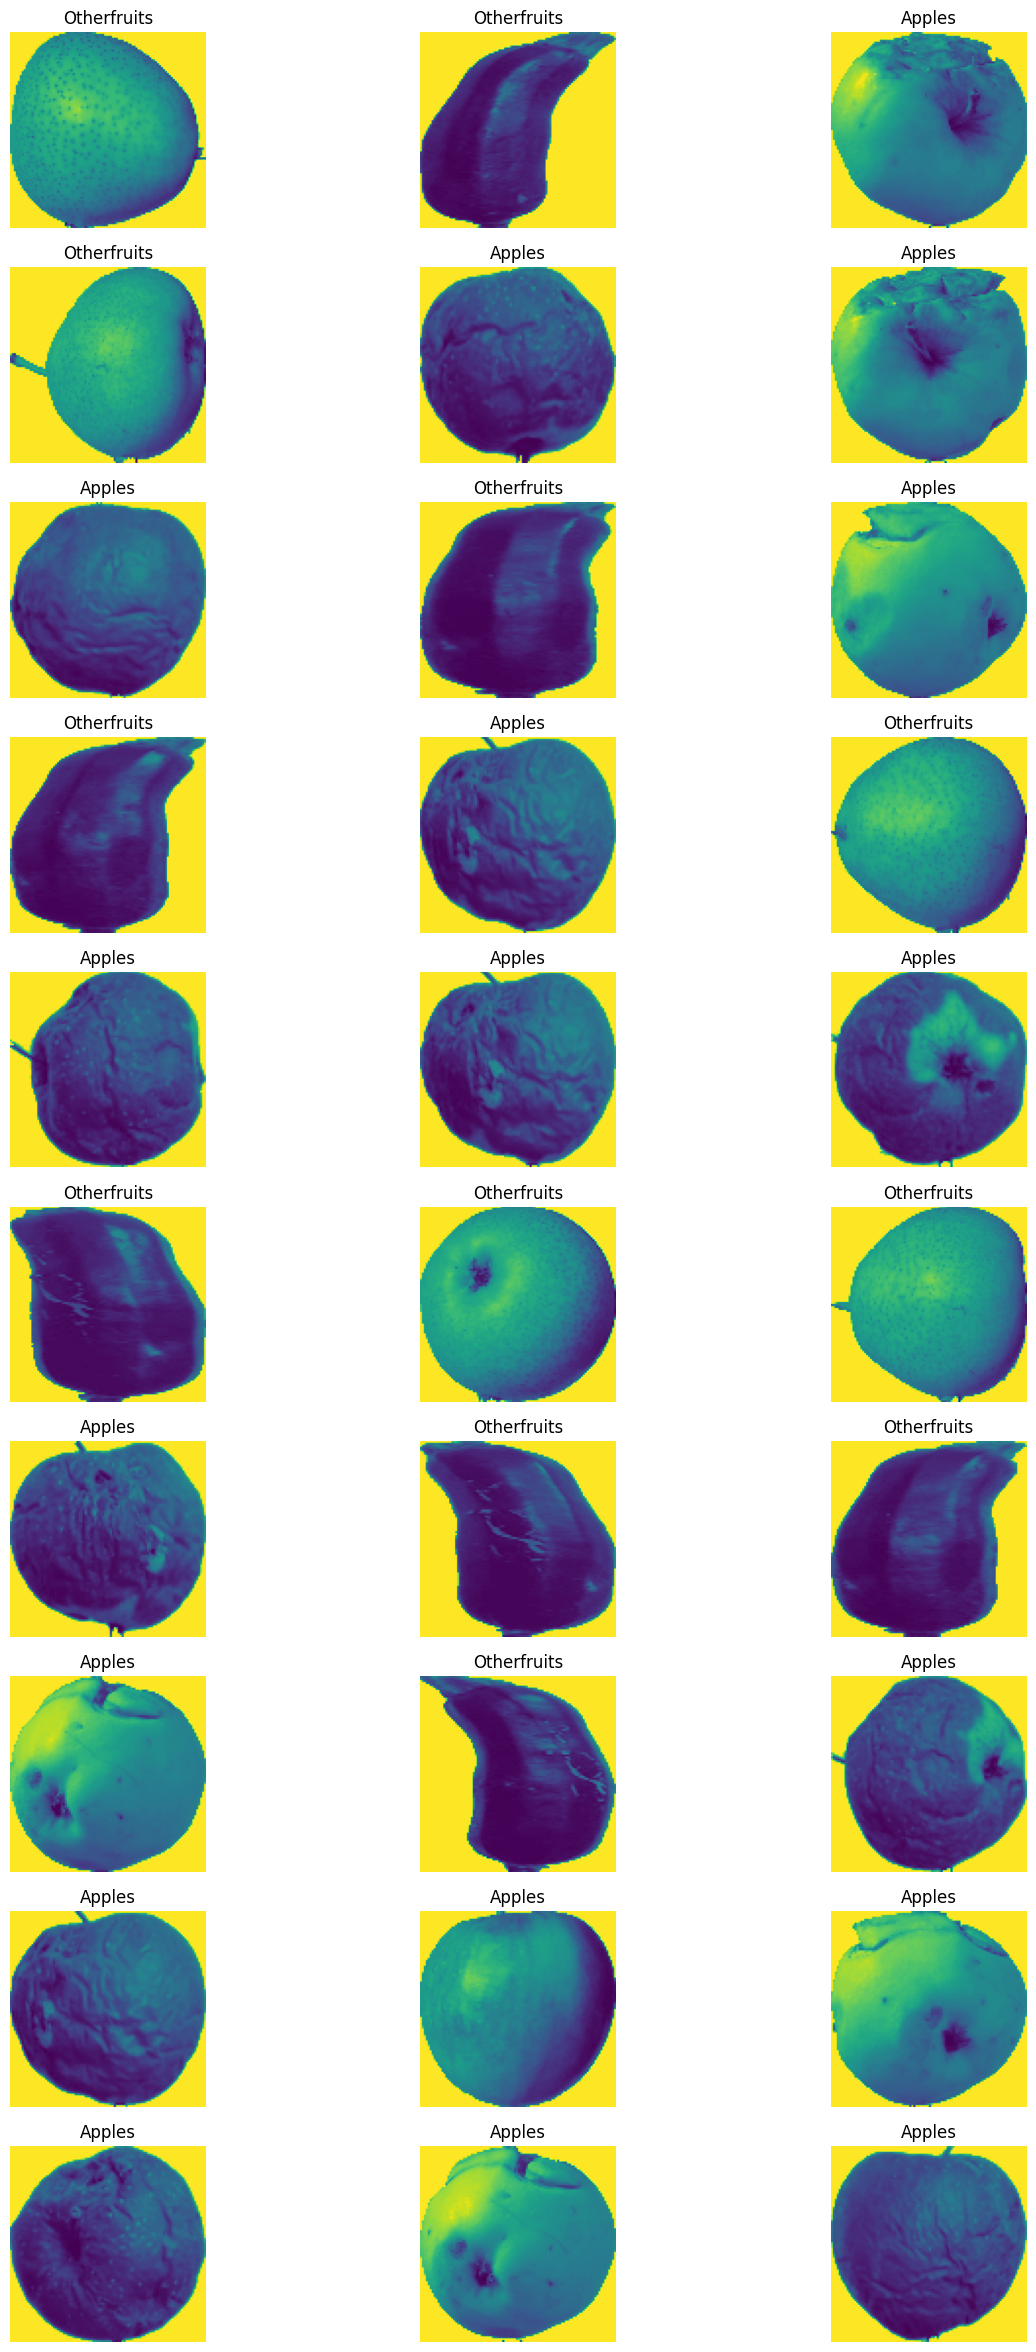

In [15]:
fig = plt.figure(figsize=(15, 30))
categories = ['Apples', 'Otherfruits']
for i in range(30):
    prediction = categories[int(model.predict(xtest[i].reshape(1, -1)))]
    img = xtest[i].reshape(100, 100)
    pt = fig.add_subplot(10, 3, i + 1)
    pt.imshow(img)
    pt.set_title(prediction)
    pt.axis('off')
    